In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 45.0 MB/s eta 

In [2]:
# check the version of pycaret installed
from pycaret.utils import version
version()

'3.1.0'

In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# create variable for file to be read
file = "/content/insurance.csv"

In [5]:
# read the file
data = pd.read_csv(file)

In [6]:
# have a look at the 1st 5 rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# check the size of the dataset
data.shape

(1338, 7)

In [8]:
# check the data types and completeness of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# check if there are duplicates
data.loc[data.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
# drop the duplicated record and re-look shape of the dataset
data.drop_duplicates(inplace=True)
data.shape

(1337, 7)

In [11]:
# setthing the graph display theme
sns.set_theme(style="whitegrid", palette='pastel')
sns.color_palette("pastel", as_cmap=True)

['#A1C9F4',
 '#FFB482',
 '#8DE5A1',
 '#FF9F9B',
 '#D0BBFF',
 '#DEBB9B',
 '#FAB0E4',
 '#CFCFCF',
 '#FFFEA3',
 '#B9F2F0']

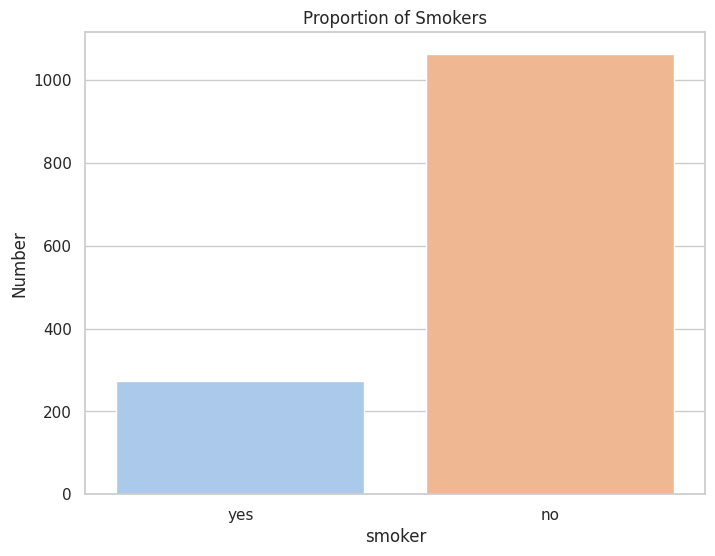

In [12]:
# understand the propportion of smokers and non-smokers in the dataset
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=data, x='smoker')
plt.title("Proportion of Smokers")
plt.ylabel("Number")
plt.show()


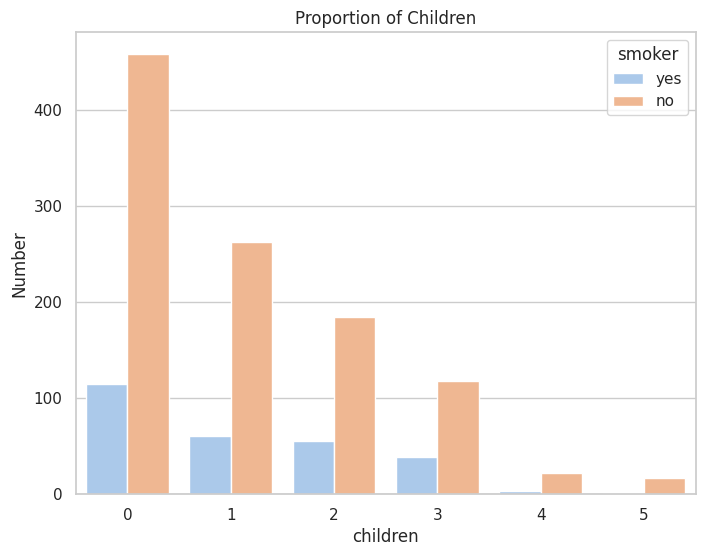

In [13]:
# checking the distibution of children and smokers/non-smokers
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=data, x='children', hue="smoker")
plt.title("Proportion of Children")
plt.ylabel("Number")
plt.show()

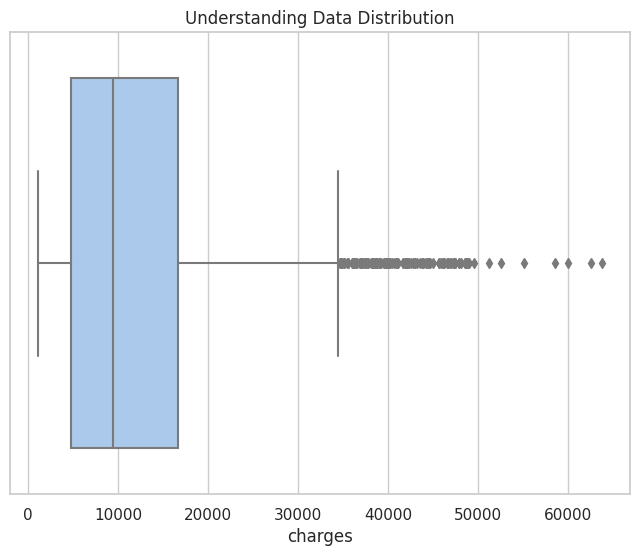

In [14]:
# checking the distibution of numerical features
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=data, x='charges')
plt.title("Understanding Data Distribution")
plt.show()

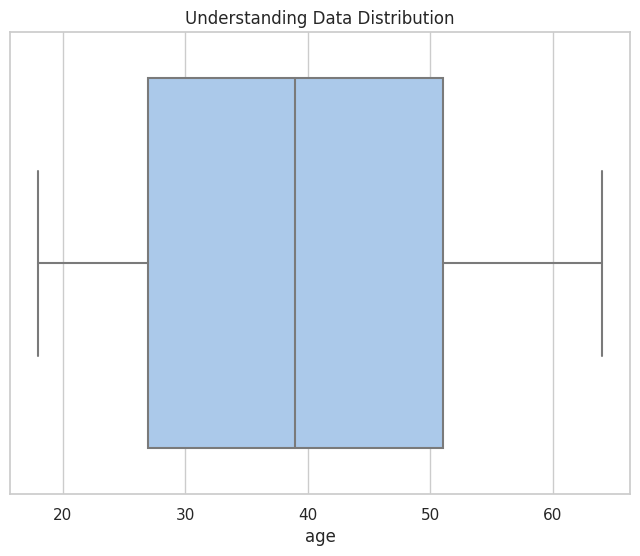

In [15]:
# checking the distibution of numerical features
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=data, x='age')
plt.title("Understanding Data Distribution")
plt.show()

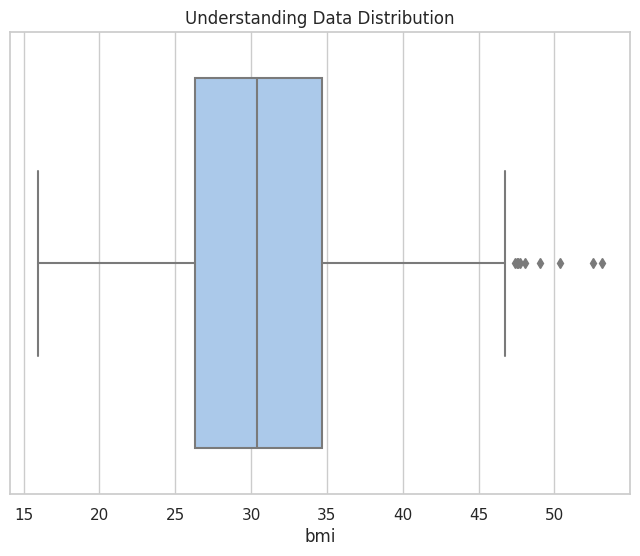

In [16]:
# checking the distibution of numerical features
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=data, x='bmi')
plt.title("Understanding Data Distribution")
plt.show()

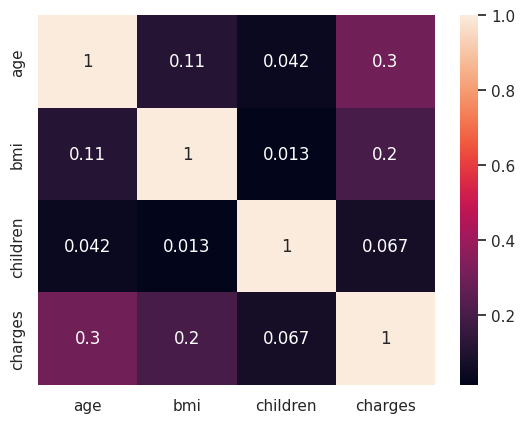

In [17]:
corr_map = data.corr()
sns.heatmap(corr_map, annot=True)
plt.show()

### Perform Regression Analysis Using the Pycaret Regression Package

In [18]:
# make a copy of the dataset for further processing
dataset = data.copy()
dataset.shape

(1337, 7)

In [19]:
# separate a portion of the dataset for testing (i.e. data not seen by the model)
df = dataset.sample(frac=0.9, random_state=123)
df_unseen = dataset.drop(df.index)

df.reset_index(drop=True, inplace=True)
df_unseen.reset_index(drop=True, inplace=True)

print("Data for Modeling: " + str(df.shape))
print("Unseen Data for Predictions: " + str(df_unseen.shape))

Data for Modeling: (1203, 7)
Unseen Data for Predictions: (134, 7)


In [20]:
# checking the unique values of the df
df.nunique()

age           47
sex            2
bmi          518
children       6
smoker         2
region         4
charges     1203
dtype: int64

In [21]:
# load the regression package from pycaret
from pycaret.regression import *

In [22]:
# setting up the experiment (without Preprocessing) by taking the dataset in its original form
exp = RegressionExperiment()
exp.setup(df, target='charges', session_id=168, train_size=0.8, preprocess=False)

,Description,Value
0,Session id,168
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1203, 7)"
4,Transformed data shape,"(1203, 7)"
5,Transformed train set shape,"(962, 7)"
6,Transformed test set shape,"(241, 7)"
7,Numeric features,3
8,Categorical features,3


In [23]:
# model training and Selection
best3_exp = exp.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2645.5537,21202959.0077,4575.3268,0.8505,0.4806,0.3130,0.1200
dummy,Dummy Regressor,8970.4585,146157363.2000,12043.9427,-0.0048,0.9828,1.4672,0.0110


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

As there are no preprocessing made,  the categorical features were not transformed, thus, resulting in only 1 good model returned.  This goes to show that in order for the machine learning model to learn and perform well, we must always do some preprocessing to the dataset (e.g. missing values, encoding of categorical features, scaling, etc.)

### Perform another experiment with Preprocessing to check if it will be better than the baseline model (lightgbm with r2 score of 0.8505

In [24]:
# setting up another experiment nut now with Preprocessing)
exp1 = RegressionExperiment()
exp1.setup(df, target='charges', session_id=168, train_size=0.8, preprocess=True, normalize=True)

,Description,Value
0,Session id,168
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1203, 7)"
4,Transformed data shape,"(1203, 10)"
5,Transformed train set shape,"(962, 10)"
6,Transformed test set shape,"(241, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [25]:
# checking available models
exp1.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [26]:
# model training and Selection
best3_exp1 = exp1.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2334.1718,19307484.4853,4358.3248,0.8642,0.3954,0.2576,0.1830
catboost,CatBoost Regressor,2443.6306,20105195.4394,4453.2304,0.8586,0.4137,0.2687,1.5990
rf,Random Forest Regressor,2424.8677,20740735.7468,4518.6419,0.8536,0.4195,0.2697,0.7150
lightgbm,Light Gradient Boosting Machine,2665.2629,21235611.2275,4581.4380,0.8502,0.4753,0.3140,0.2380
et,Extra Trees Regressor,2476.4754,23106355.1047,4784.7136,0.8373,0.4142,0.2499,0.5820
xgboost,Extreme Gradient Boosting,2819.1480,24177798.9000,4873.8586,0.8296,0.5265,0.3291,0.1850
ada,AdaBoost Regressor,4004.7377,25928026.6390,5068.3094,0.8171,0.5975,0.6726,0.1240
knn,K Neighbors Regressor,3265.2770,30324584.0000,5492.2383,0.7869,0.4530,0.3249,0.1100
dt,Decision Tree Regressor,2675.3315,34221100.3366,5816.2830,0.7582,0.4673,0.2777,0.1010
br,Bayesian Ridge,4050.4175,34967184.8067,5887.9169,0.7565,0.5376,0.3990,0.1020


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [27]:
# what are the 3 best models?
best3_exp1

[GradientBoostingRegressor(random_state=168),
 RandomForestRegressor(n_jobs=-1, random_state=168)]

In [28]:
# create a model based on best
gbr = exp1.create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2146.2020,18201400.5229,4266.3099,0.8918,0.3446,0.2435
1,2689.3564,27553007.0762,5249.0958,0.8266,0.4517,0.2646
2,2311.1847,17860956.6998,4226.2225,0.9010,0.3392,0.2625
3,2184.9898,16276740.6790,4034.4443,0.8646,0.3934,0.2203
4,1947.4166,13581352.0065,3685.2886,0.8663,0.3457,0.2511
5,2558.8811,19359249.2956,4399.9147,0.8556,0.4163,0.2939
6,1992.1354,11371677.2126,3372.1918,0.9284,0.3754,0.2527
7,2422.5433,20147789.5704,4488.6289,0.8497,0.3848,0.2503
8,2303.4509,22139673.6692,4705.2815,0.8739,0.4033,0.2632


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
# getting the parameters of the gbr estimator
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 168,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [30]:
# tuning the model
tuned_gbr = exp1.tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2630.0626,20958803.7454,4578.0786,0.8754,0.3946,0.3107
1,3299.2869,30948782.4283,5563.1630,0.8052,0.5014,0.3597
2,2642.5035,19383531.1135,4402.6732,0.8926,0.3947,0.3351
3,2786.8801,21773923.3534,4666.2537,0.8188,0.4239,0.2924
4,2089.8952,13299766.5708,3646.8845,0.8691,0.3875,0.3051
5,2700.7700,18099760.8718,4254.3814,0.8650,0.4639,0.3960
6,2357.9277,14816662.4389,3849.2418,0.9067,0.4048,0.3098
7,2694.0660,18503672.4151,4301.5895,0.8620,0.4389,0.3655
8,2533.9431,23896742.5889,4888.4295,0.8639,0.4505,0.3470


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [31]:
# getting the parameters of the tuned model
tuned_gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 168,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

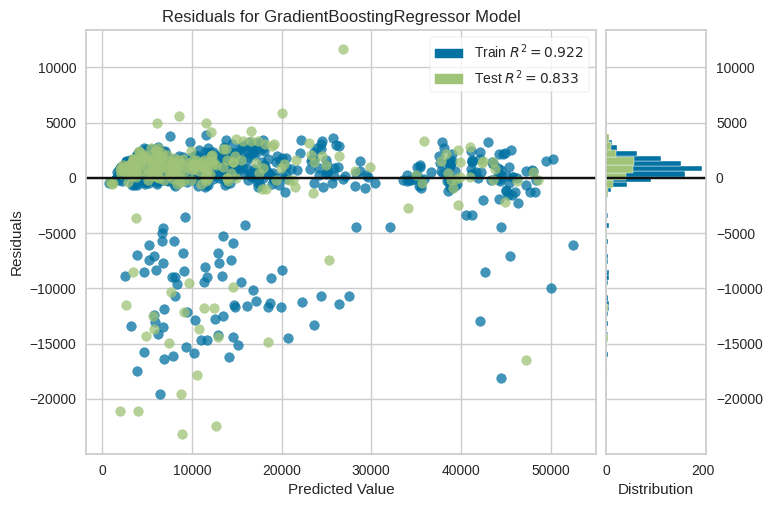

In [32]:
# plotting some metrics
exp1.plot_model(gbr)

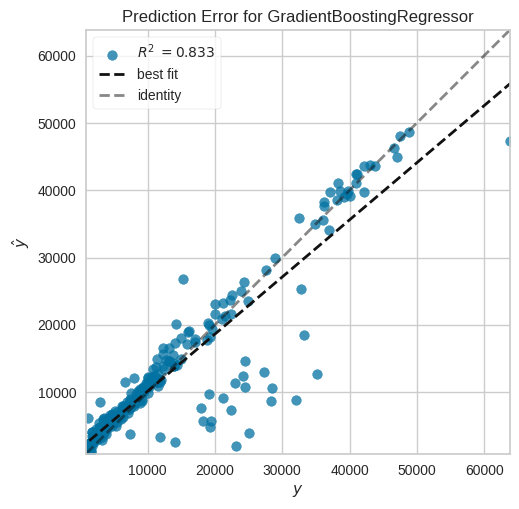

In [33]:
exp1.plot_model(gbr, plot='error')

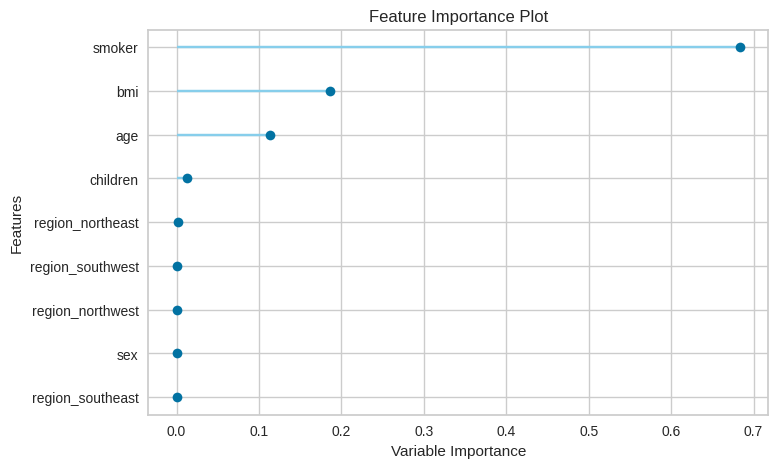

In [34]:
exp1.plot_model(gbr, plot='feature')

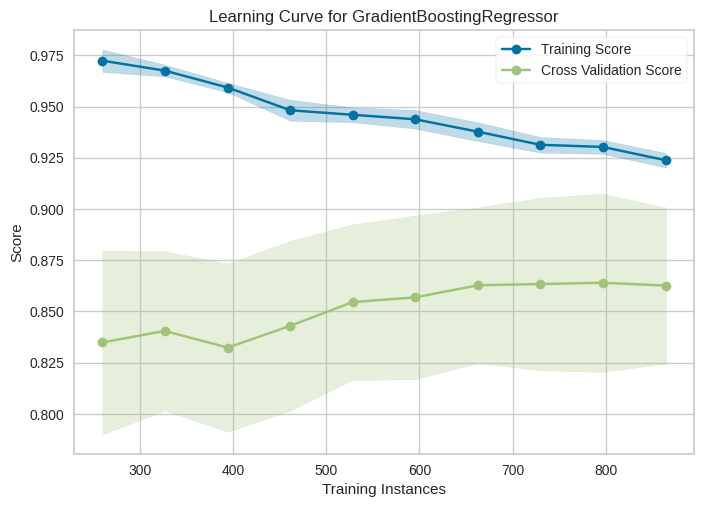

In [35]:
exp1.plot_model(gbr, plot='learning')

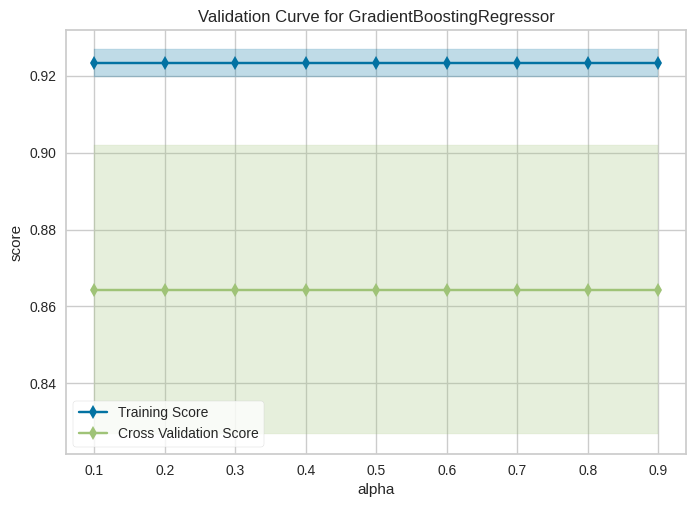

In [36]:
exp1.plot_model(gbr, plot='vc')

In [37]:
# trying out whether an ensembled model of the best 3 models will work better
blender = exp1.blend_models(estimator_list = best3_exp1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1965.9311,16503894.7910,4062.4986,0.9019,0.3222,0.2142
1,2737.8821,28081720.2560,5299.2188,0.8233,0.4565,0.2603
2,2272.9598,17141622.8035,4140.2443,0.9050,0.3406,0.2664
3,2262.1376,16709611.0985,4087.7391,0.8610,0.3946,0.2371
4,1906.5954,12968866.9763,3601.2313,0.8723,0.3651,0.2595
5,2465.6730,19900929.4425,4461.0458,0.8515,0.4260,0.2823
6,2166.9843,12256706.0261,3500.9579,0.9228,0.4073,0.2892
7,2443.0589,19005468.5083,4359.5262,0.8583,0.3772,0.2632
8,2216.6563,21762275.8332,4665.0054,0.8761,0.3721,0.2171


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

The blended model did slightly better than the improved model with preprocessing of r2 score of 0.8642.

In [38]:
# How about if we stack the models?  Will the result be better?
stacker = exp1.stack_models(estimator_list = best3_exp1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2037.7426,17136627.5331,4139.6410,0.8982,0.3314,0.2283
1,2694.5523,28089300.3701,5299.9340,0.8232,0.4584,0.2582
2,2278.9482,17259281.8994,4154.4292,0.9043,0.3356,0.2630
3,2217.3662,16419097.5984,4052.0486,0.8634,0.3910,0.2307
4,1879.5896,12963566.6300,3600.4953,0.8724,0.3582,0.2549
5,2489.3917,20005589.7352,4472.7609,0.8508,0.4245,0.2836
6,2078.1751,12121169.5617,3481.5470,0.9237,0.3942,0.2722
7,2409.5510,19626646.3138,4430.1971,0.8536,0.3774,0.2544
8,2189.7165,21702504.9688,4658.5947,0.8764,0.3851,0.2331


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

The stacked model also did not do better than that of the gbr and the blender model

In [39]:
# have a graphical representation of the blender model
blender

VotingRegressor(estimators=[('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=168)),
                            ('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x792809c3b850>),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=168))],
                n_jobs=-1)

### When the 3 best models are stacked together, the r2 score is better than that of the improved model but the blender model returned a better r2 score than the slacked and improved models.  We will use the blender model as the final model.

In [40]:
# tune the blended models
tuned_blender = exp1.tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2016.1195,17083133.8712,4133.1748,0.8985,0.3298,0.2229
1,2717.5182,27671979.3778,5260.4163,0.8259,0.4501,0.2614
2,2264.5812,17354191.8759,4165.8363,0.9038,0.3347,0.2596
3,2223.5393,16575398.3006,4071.2895,0.8621,0.3945,0.2275
4,1921.8152,13072942.9211,3615.6525,0.8713,0.3541,0.2548
5,2459.6529,19294713.2227,4392.5748,0.8561,0.4200,0.2850
6,2106.2078,11713973.7718,3422.5683,0.9263,0.3964,0.2765
7,2388.1862,18915583.7470,4349.2050,0.8589,0.3688,0.2515
8,2272.3696,22017334.7508,4692.2633,0.8746,0.3838,0.2383


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [41]:
# predictions on the holdout test set
holdout_pred = exp1.predict_model(tuned_blender)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2601.6470,25031393.9398,5003.1384,0.8325,0.4563,0.2889


In [42]:
# have a look at the last 1o records
holdout_pred.tail(10)

,age,sex,bmi,children,smoker,region,charges,prediction_label
426,63,male,35.090000,0,yes,southeast,47055.531250,45056.611908
27,46,male,43.889999,3,no,southeast,8944.115234,8316.467952
1097,19,male,20.700001,0,no,southwest,1242.816040,892.076416
467,29,male,33.345001,2,no,northwest,19442.353516,5548.799168
764,50,female,23.540001,2,no,southeast,10107.220703,12849.766567
807,48,male,36.669998,1,no,northwest,28468.919922,10584.788156
334,40,female,28.120001,1,yes,northeast,22331.566406,21955.042294
1067,45,female,33.099998,0,no,southwest,7345.083984,7631.309310
169,54,female,47.410000,0,yes,southeast,63770.429688,46613.073192
858,21,male,22.299999,1,no,southwest,2103.080078,3212.210583


In [43]:
# finalize the model
final_blender = exp1.finalize_model(tuned_blender)

In [44]:
# predictions on the unseen data
unseen_pred = exp1.predict_model(final_blender, data=df_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2825.6351,26593478.8548,5156.8865,0.8153,0.4590,0.2805


In [45]:
# looking at the predictions on unseen data
unseen_pred.tail(10)

,age,sex,bmi,children,smoker,region,charges,prediction_label
124,33,male,29.400000,4,no,southwest,6059.172852,7048.458933
125,45,male,27.500000,3,no,southwest,8615.299805,10546.365197
126,43,male,25.520000,5,no,southeast,14478.330078,9420.788576
127,39,male,29.924999,1,yes,northeast,22462.042969,24192.787459
128,20,male,39.400002,2,yes,southwest,38344.566406,38766.038278
129,18,male,26.125000,0,no,northeast,1708.925781,2136.340061
130,25,female,30.200001,0,yes,southwest,33900.652344,34012.266564
131,42,male,26.315001,1,no,northwest,6940.909668,7349.929025
132,19,female,20.600000,0,no,southwest,1731.677002,1710.711672
133,18,female,36.849998,0,no,southeast,1629.833496,2917.379649


When predicting on data not seen by the model, the r2 score is 0.8153 and this could mean that the tuned model was probably overfitting the data.  We could also check if the single model (Gradient Boosting Regressor) could be improved to obtain a better outcome on the unseen dataset

In [46]:
# saving the model
exp1.save_model(final_blender, "insurance_pycaret_regression")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('actual_estimator',
                  VotingRegressor(estimators=[('Gradient Boosting Regressor',
                                               GradientBoostingRegressor(random_state=168)),
                                              ('CatBoost Regressor',
                                               <catboost.core.

In [47]:
# loading the saved model
blended_regressor = load_model("/content/insurance_pycaret_regression")

Transformation Pipeline and Model Successfully Loaded


In [48]:
# checked the loaded model
blended_regressor

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker'],
                                    transfor...
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('actual_estimator',
                 VotingRegressor(estimators=[('Gradient Boosting Regressor',
                                              GradientBoostingRegressor(random_state=168)),
                                             ('CatBoost Regressor',
                                              <catboost.core.CatBoostRegressor object at 0x7927da5cf5e0>),
                                             ('Random Forest Regressor',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=168))],
                                 n_jobs=-1,
                                 weights=[0.42000000000000004, 0.2,
                                          0.060000000000000005]))])